In [28]:
import pandas as pd
import numpy as np
import operator
def dict_sort_des(diction):
    sorted_d = sorted(diction.items(), key=operator.itemgetter(1), reverse = True)
    return sorted_d
# !pip3 install plotly --user
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [29]:
df = pd.read_csv('R15.txt', sep="\t", header = None)
df.columns = ['First', 'Second', 'Third']
df.head()

,First,Second,Third
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1


In [38]:
len(df)

600

In [30]:
set(df['Third'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

data1: mean=9.998 stdv=3.263
data2: mean=9.980 stdv=3.262


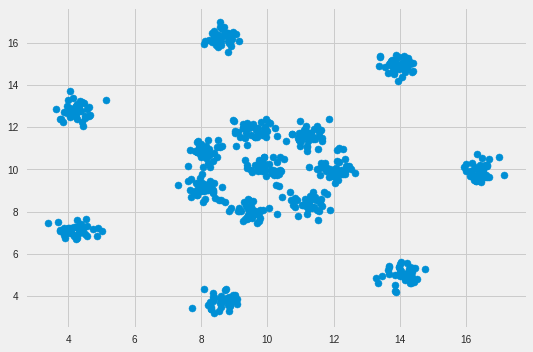

In [31]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = df['First']
data2 = df['Second']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

In [32]:
eps = np.finfo(float).eps

In [33]:
df.head()

,First,Second,Third
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.44958467020947335
For n_clusters = 3 The average silhouette_score is : 0.5017734910788543
For n_clusters = 4 The average silhouette_score is : 0.5501066260350748
For n_clusters = 5 The average silhouette_score is : 0.5333125734411746
For n_clusters = 6 The average silhouette_score is : 0.5730416921981574
For n_clusters = 7 The average silhouette_score is : 0.5866135458559992
For n_clusters = 8 The average silhouette_score is : 0.6429135751792692
For n_clusters = 9 The average silhouette_score is : 0.7009877159089074
For n_clusters = 10 The average silhouette_score is : 0.7042206028230877
For n_clusters = 11 The average silhouette_score is : 0.7144878159376045
For n_clusters = 12 The average silhouette_score is : 0.7389396532078008
For n_clusters = 13 The average silhouette_score is : 0.728023231691881
For n_clusters = 14 The average silhouette_score is : 0.76464244614

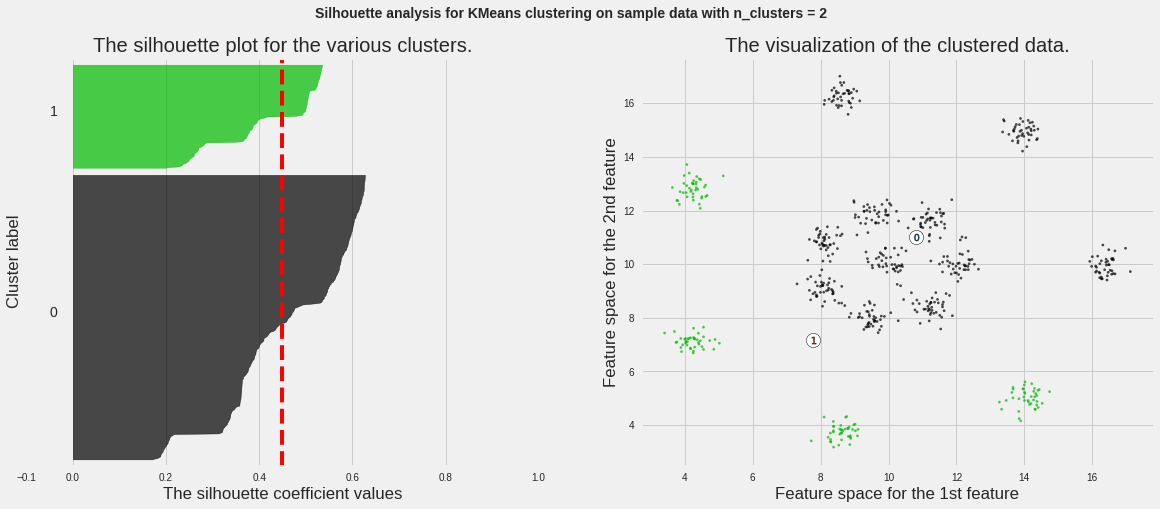

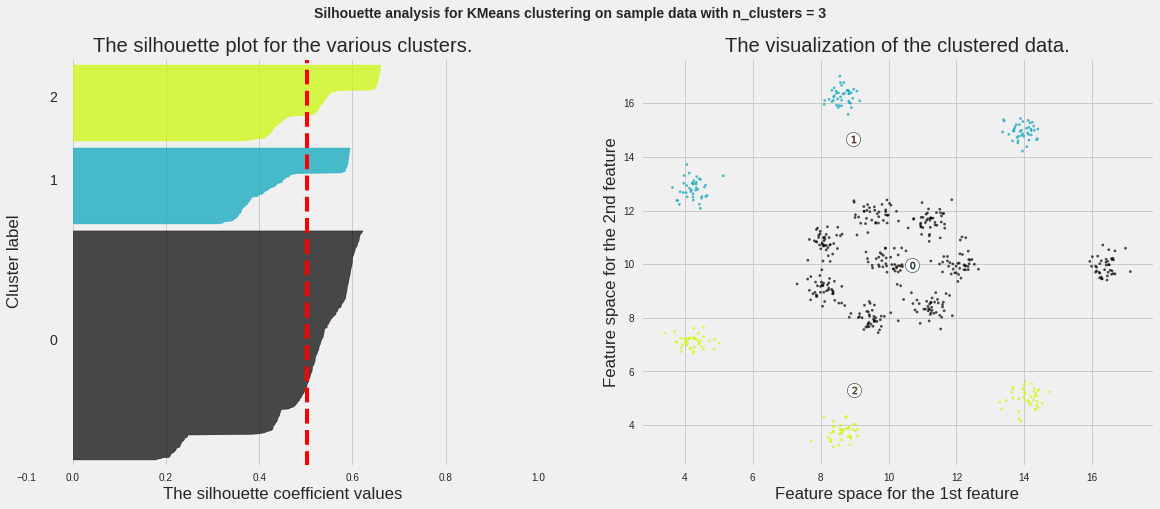

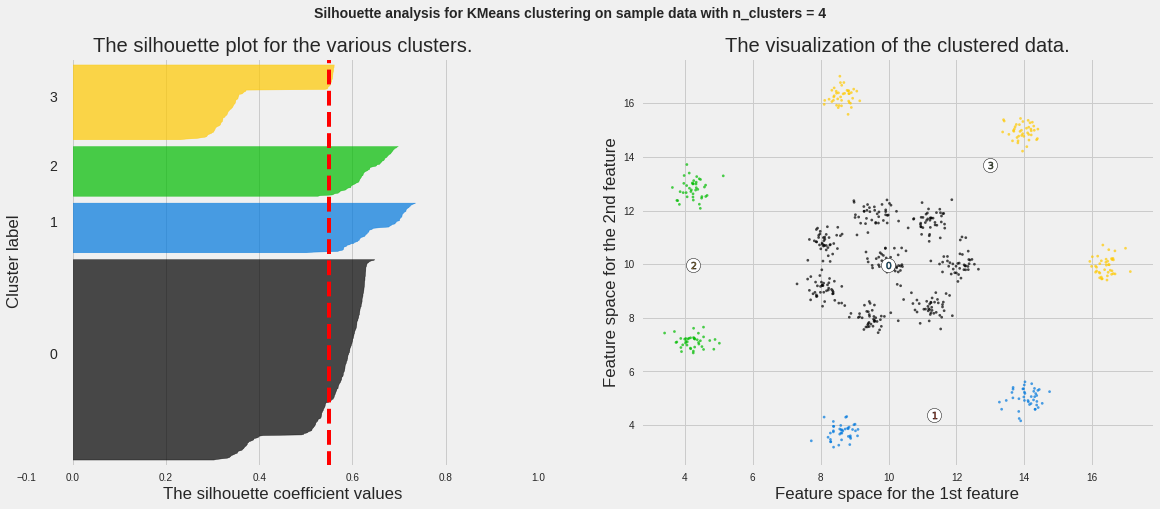

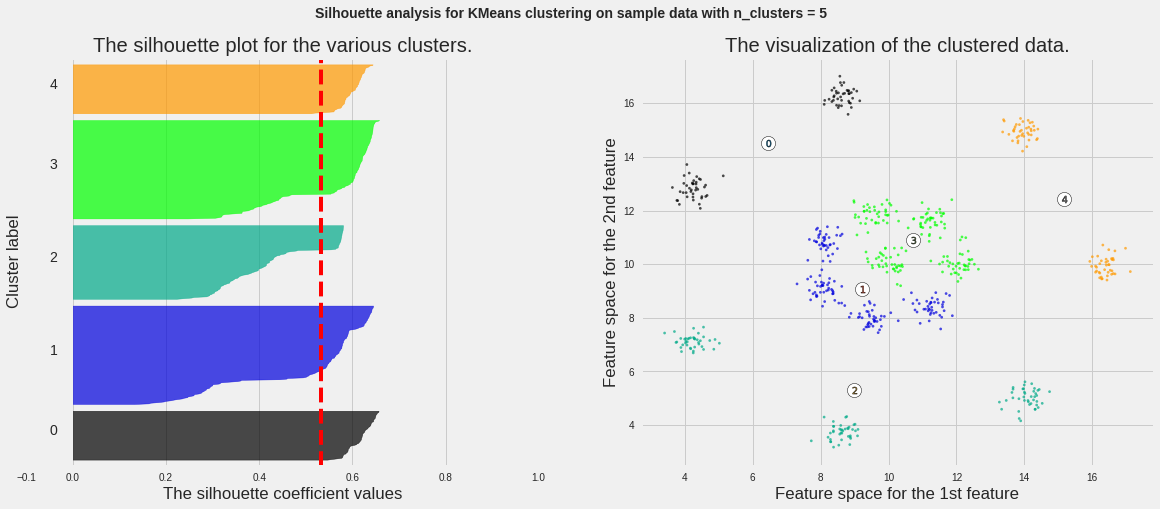

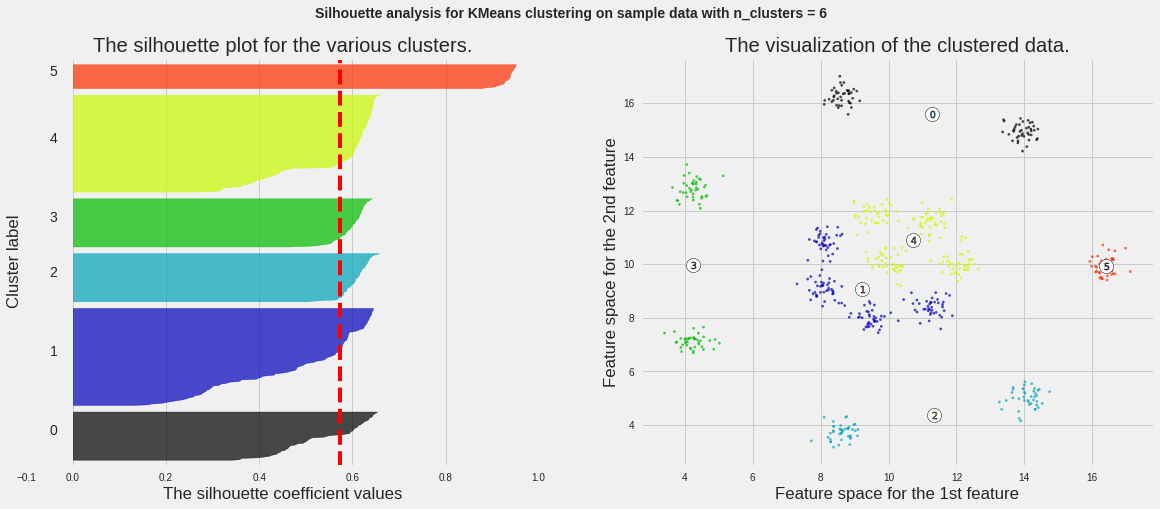

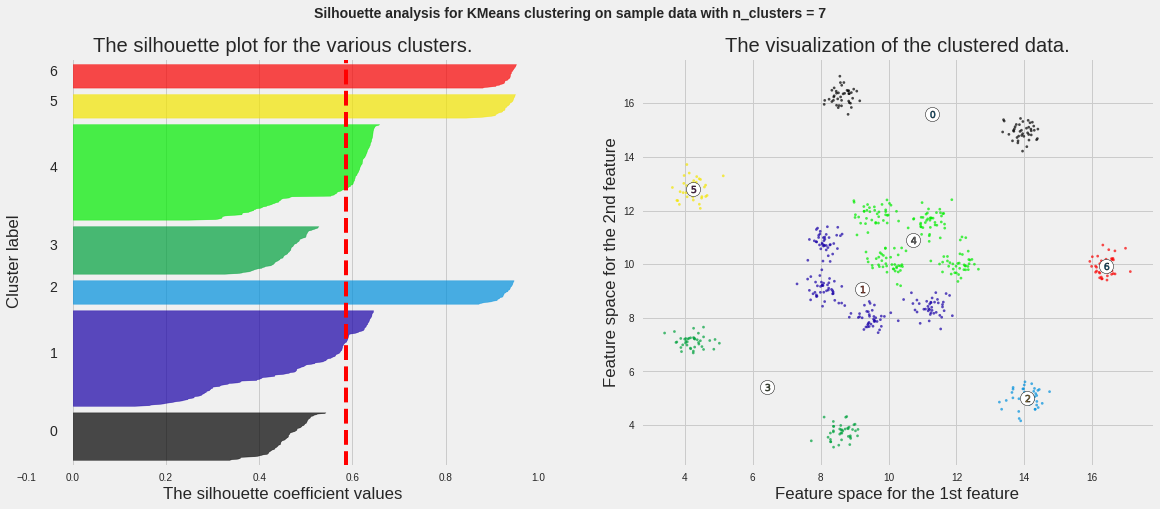

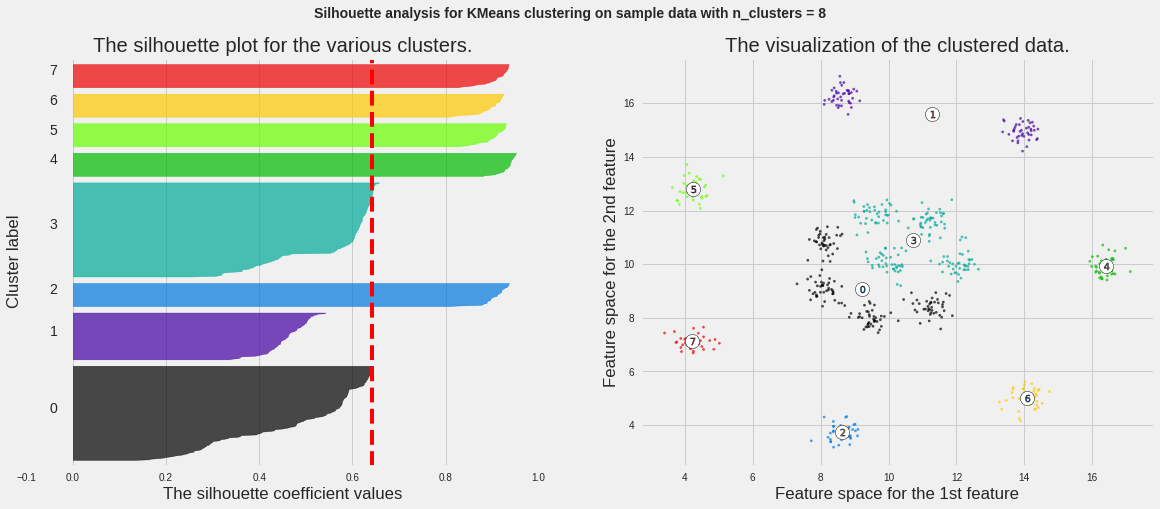

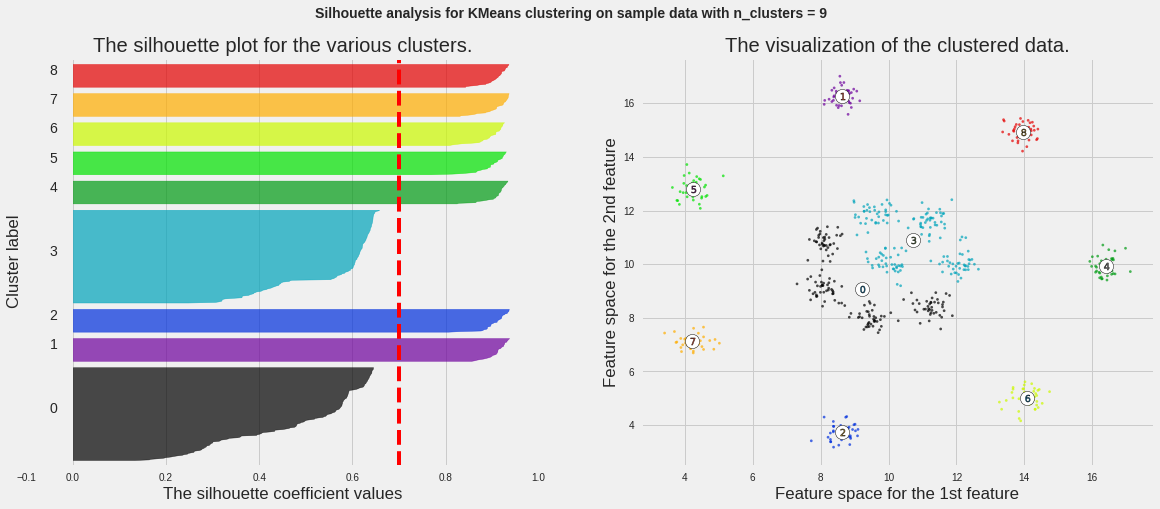

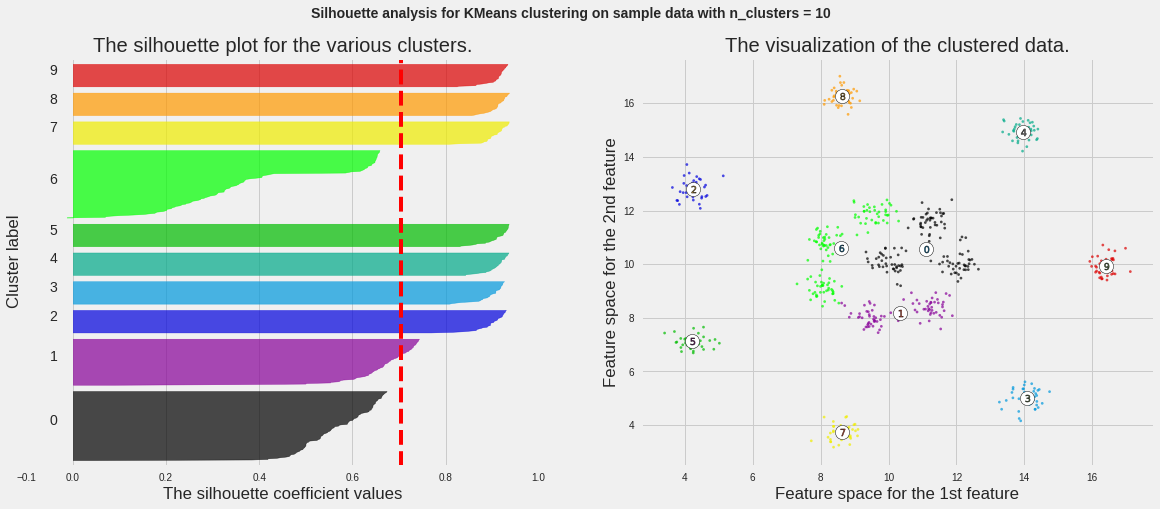

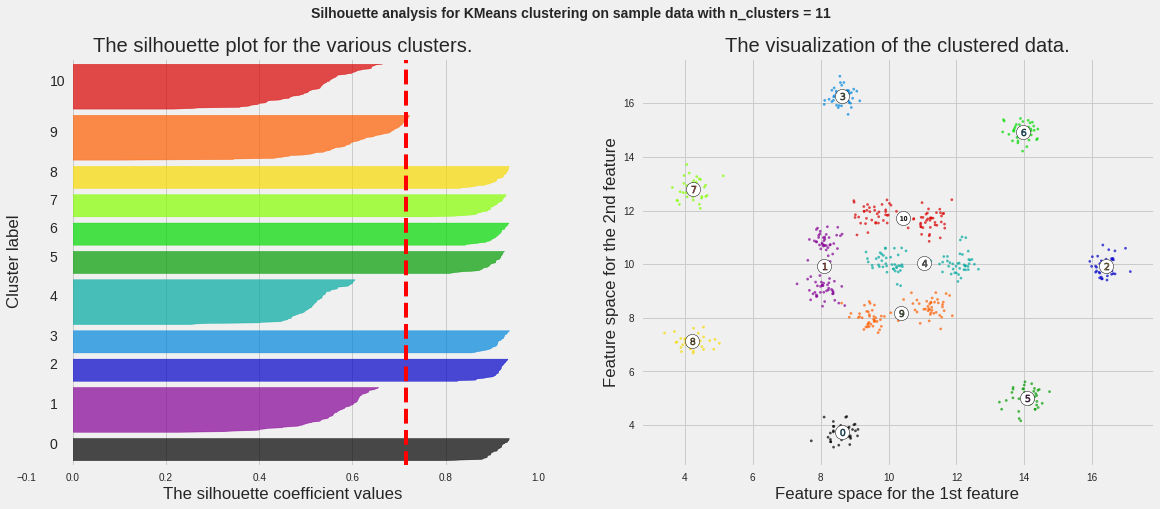

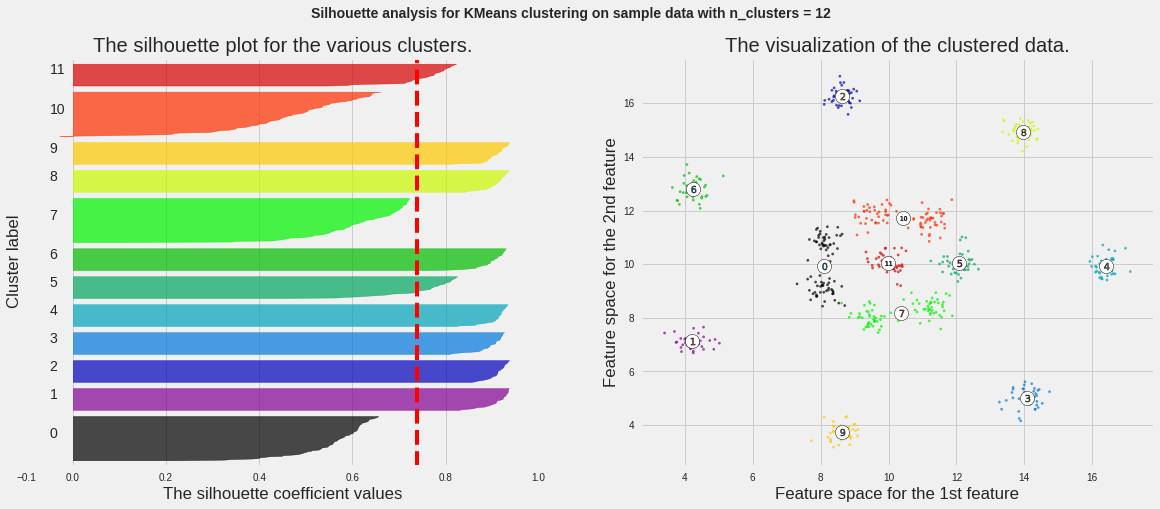

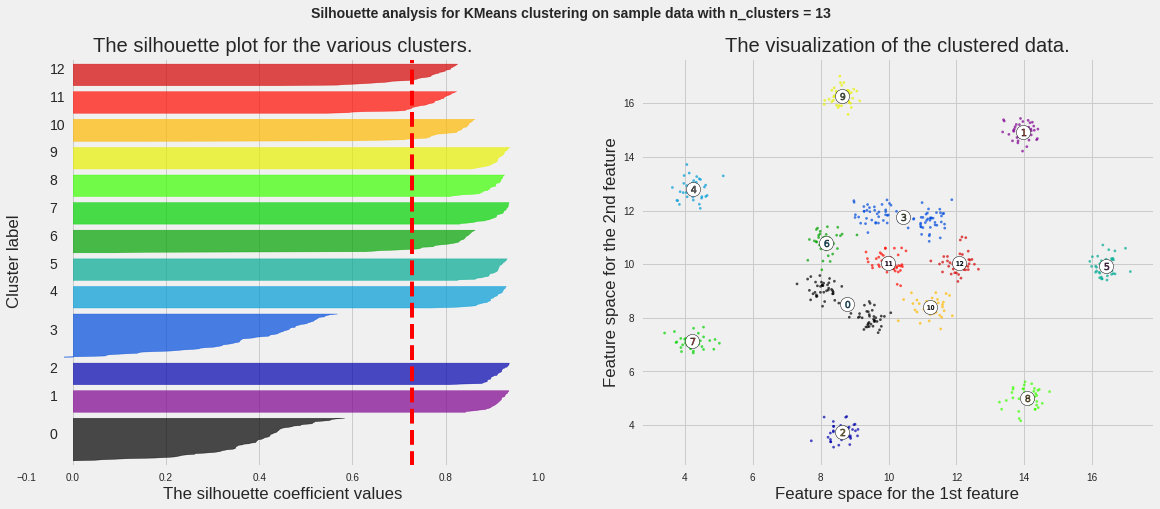

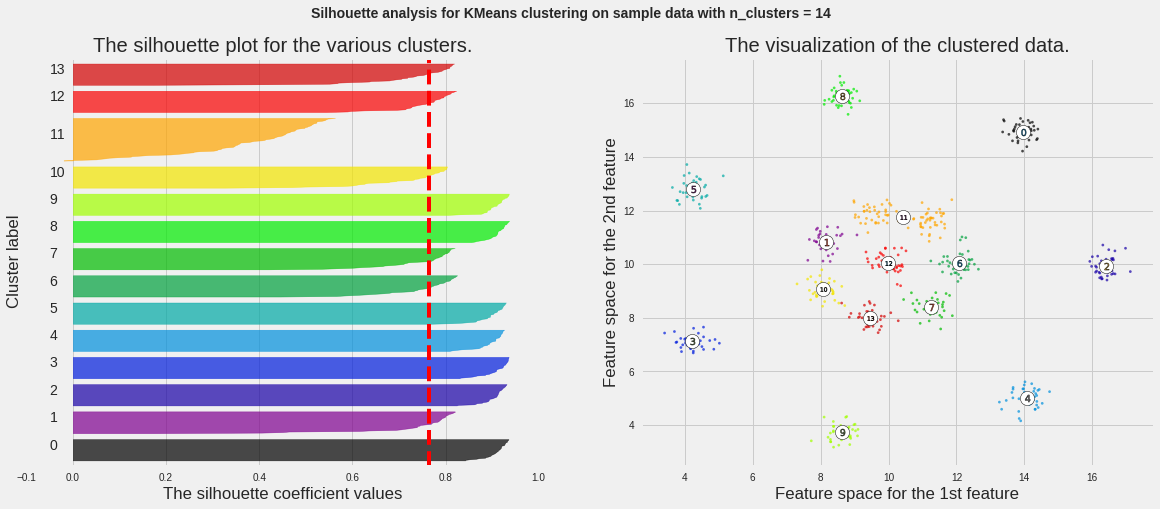

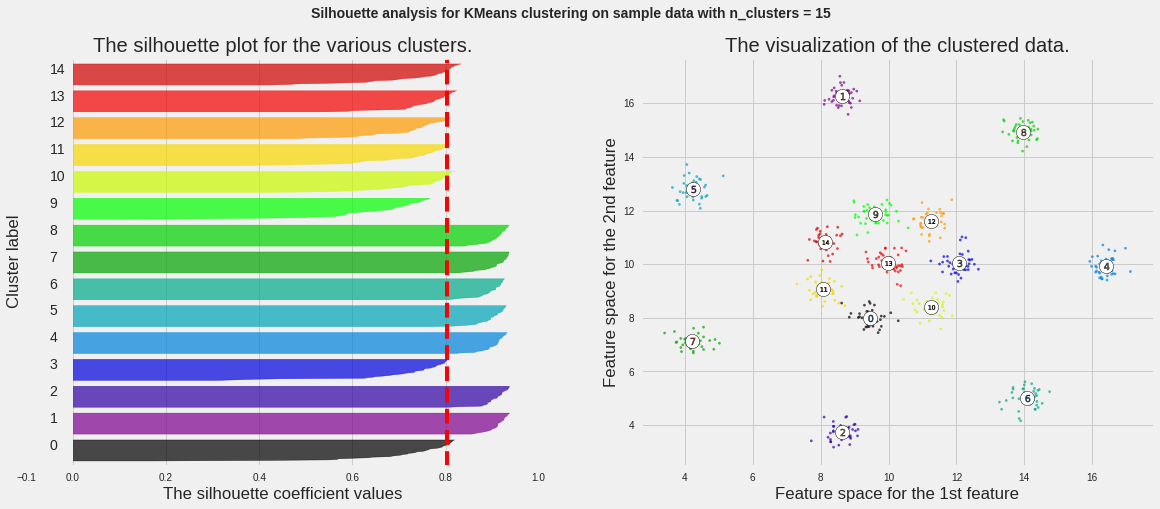

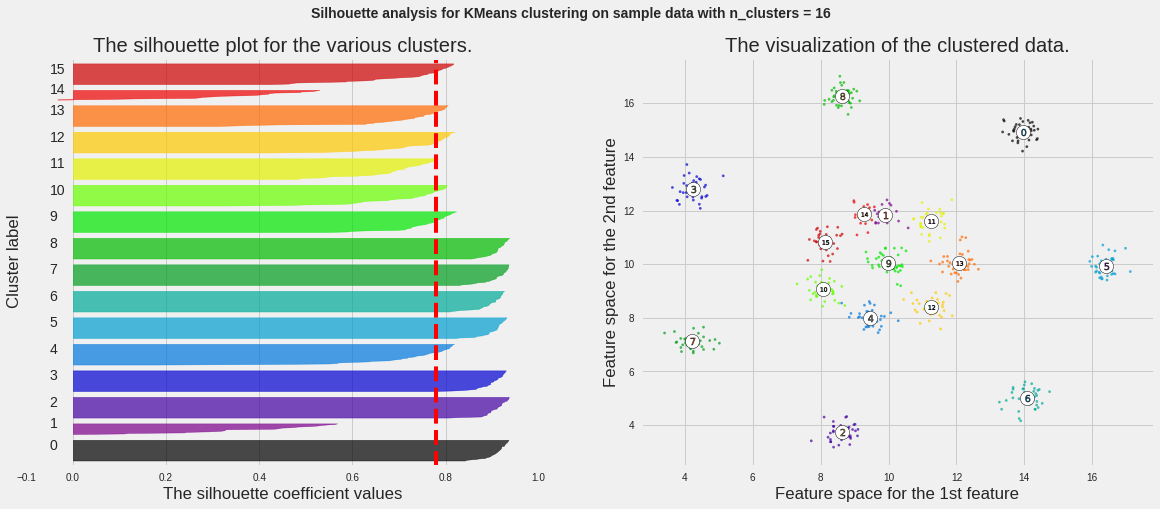

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = np.array(df)
range_n_clusters = range(2, 17)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

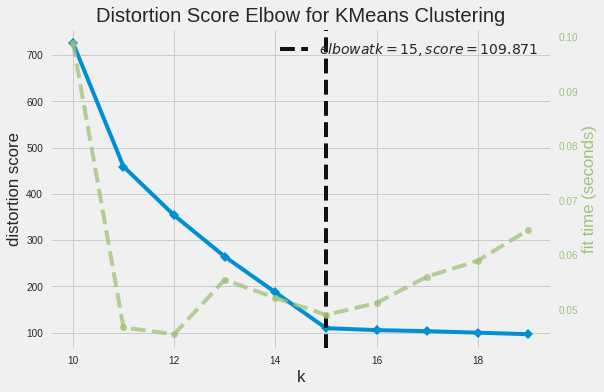

In [37]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X = np.array(df)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(np.array(df))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

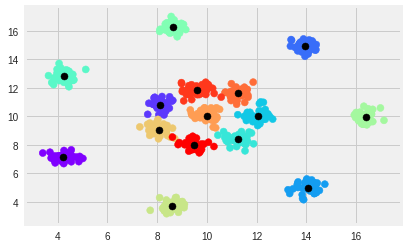

In [42]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')